<a href="https://colab.research.google.com/github/Yeoonsu/SideProject/blob/main/%5B4_1%5D_4%EB%A0%88%EB%B2%A8%EB%A1%9C_%EC%83%88%EB%A1%9C_%EC%A0%84%EC%B2%98%EB%A6%AC%ED%95%98%EB%8A%94_%EA%B2%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2022.04.18 9:49 PM

- 연도별로 데이터 각각 따로 작업함.
- 4레벨(가장 하위 레벨) 데이터
- 예측 문제가 아니라 관계를 보려는 것이므로 연속하지 않은 가구도 포함
- 각 칼럼별로 min max 비율이 얼마인지 확인함
- 로그 스케일링
- TabNet 돌려서 에러율 비교, feature importance 확인



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)

2017년

In [ ]:
df_2017 = pd.read_csv("2017.csv")

In [ ]:
df_2017.head()

,조사년도,MD제공용_가구고유번호,조사부문코드,가중값,가중값(금융부문),가중값(복지부문),수도권코드,가구주_성별코드,가구원수,노인가구코드,조손가구코드,한부모가구코드,다문화가구코드(2012년~),장애인가구코드(2012년~),가구주_교육정도_학력코드,가구주_교육정도_수학구분코드,가구주_교육정도_통합코드,가구주_동거코드,가구주_산업대분류코드,가구주_직업대분류코드,가구주_만연령,가구주_연령10세단위코드,가구주_종사상지위코드,보도용_가구주종사상지위코드,가구주_혼인상태코드,입주형태코드,입주형태통합코드,과거기준입주형태통합코드,전용면적규모코드,주택종류통합코드,부채보유코드,소득5분위코드(보완),소득5분위코드(금융부문)(보완),소득5분위코드(복지부문)(보완),소득계층구간코드(보도용)(보완),자산총액5분위코드,자산총액5분위코드(금융부문),자산총액5분위코드(복지부문),순자산5분위코드,순자산5분위코드(금융부문),순자산5분위코드(금융부문).1,자산금액,자산_금융자산,자산_금융자산_저축금액,자산_금융자산_저축_적립예치식저축금액,자산_금융자산_저축_기타저축금액,자산_금융자산_현거주지전월세보증금,자산_실물자산,자산_실물자산_부동산금액,자산_실물자산_부동산_거주주택금액,자산_실물자산_부동산_거주주택이외부동산금액,자산_실물자산_부동산_계약금중도금납입금액,자산_실물자산_기타실물자산,자산_실물자산_기타실물자산_자동차금액,자산_실물자산_기타실물자산_기타금액,자산_실물자산_기타실물자산_기타_자동차이외기타실물자산,자산_실물자산_기타실물자산_기타_권리금,부채,부채_금융부채,부채_금융부채_담보대출금액,부채_금융부채_담보대출_대출용도_거주주택구입금액,부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_담보대출_대출용도_전월세보증금마련금액,부채_금융부채_담보대출_대출용도_부채상환금액,부채_금융부채_담보대출_대출용도_사업자금마련금액,부채_금융부채_담보대출_대출용도_생활비마련금액,부채_금융부채_담보대출_대출용도_기타용도금액,부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외),부채_금융부채_담보대출_대출기관_저축은행금액,부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함),부채_금융부채_담보대출_대출기관_보험회사금액,부채_금융부채_담보대출_대출기관_기타기관금액,부채_금융부채_담보대출_상환방법_만기일시금액,부채_금융부채_담보대출_상환방법_원금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_담보대출_상환방법_기타상환방법금액,부채_금융부채_담보대출_담보형태_거주주택금액,부채_금융부채_담보대출_담보형태_거주주택이외부동산금액,부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액,부채_금융부채_담보대출_담보형태_기타금액,부채_금융부채_담보대출_부동산담보대출금액,부채_금융부채_담보대출_부동산이외담보대출금액,부채_금융부채_신용대출금액,부채_금융부채_신용대출_대출용도_거주주택구입금액,부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_신용대출_대출용도_전월세보증금마련금액,부채_금융부채_신용대출_대출용도_부채상환금액,부채_금융부채_신용대출_대출용도_사업자금마련금액,부채_금융부채_신용대출_대출용도_생활비마련금액,부채_금융부채_신용대출_대출용도_기타용도금액,부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외),부채_금융부채_신용대출_대출기관_저축은행금액,부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함),부채_금융부채_신용대출_대출기관_보험회사금액,부채_금융부채_신용대출_대출기관_기타기관금액,부채_금융부채_신용대출_상환방법_만기일시금액,부채_금융부채_신용대출_상환방법_원리분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_신용대출_상환방법_기타상환방법금액,부채_금융부채_신용대출_대출종류_신용대출금액,부채_금융부채_신용대출_대출종류_마이너스통장금액,부채_금융부채_신용카드관련대출금액,부채_금융부채_외상할부미상환금액,부채_금융부채_계탄후불입금액,부채_금융부채_개인직장빌린금액(2017년~),부채_임대보증금,원리금상환금액,원리금상환_원금상환금액,원리금상환_이자지급금액,순자산금액,경상소득(보완),경상소득_근로소득(보완),경상소득_사업소득(보완),경상소득_재산소득(보완),경상소득_공적이전소득(보완),경상소득_사적이전소득(조사),경상소득_이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)],처분가능소득(보완)[경상소득(보완)-비소비지출(보완)],지출_소비지출,지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_소비지출_의료비,지출_소비지출_교통비,지출_소비지출_통신비,지출_소비지출_기타소비지출,"지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)",지출_비소비지출금액(보완),지출_비소비지출_세금(보완),지출_비소비지출_공적연금사회보험료(보완),지출_비소비지출_가구간이전지출(조사),지출_비소비지출_비영리단체이전지출(조사),지출_비소비지출_연간지급이자(보완),여유자금운용계획코드,금융자산투자주목적코드,금융자산투자운용방법코드,금융자산투자고려사항코드,거주지주택가격전망코드,여유자금부동산투자여부,부동산투자주목적코드,부동산투자선호부동산코드,부동산투자기피사유코드,1년후금융부채규모전망코드,부채증가원인코드,1년전대비부채증감여부,부채상환방법코드,원리금연체여부,원리금연체사유코드,30일이상원리금연체여부,원리금상환생계부담정도코드,생계부담예상소득대비원리금상환금액비중,원리금상환기인가계지출감소여부,원리금상환기인가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴실제연령,가구주_은퇴시_적정생활비충당여부,가구주은퇴_생활비재원마련코드(2014년~)
0,2017,10200151,P,2097.428803,NaN,4286.393681,G1,2,3,G2,G2,G2,G2,G2,6,1.0,G4,2,P,3,54,G4,1,G1,2,1,G1,G1,G4,G2,G1,Q5,NaN,Q5,G6,Q5,NaN,Q5,Q5,NaN,Q5,128506,70406,70406,65406,5000,0,58100,56000,56000,0,0,2100,2100,0,0,0,9000,9000,9000,9000,0,0,0,0,0,0,9000,0,0,0,0,NaN,NaN,NaN,NaN,NaN,9000,0,0,0,9000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1261,968,293,119506,13718,11147,2500,71,0,0,0,11492,5484.0,600.0,480.0,0.0,72.0,360.0,432.0,3540.0,7710,2226,730,783,0,420,293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,60.0,300.0,500.0,2.0,NaN,NaN,NaN
1,2017,10200161,P,1361.768747,NaN,2745.930377,G1,1,5,G2,G2,G2,G2,G2,5,1.0,G4,2,I,4,47,G3,1,G1,2,1,G1,G1,G2,G2,G1,Q5,NaN,Q5,G6,Q5,NaN,Q5,Q5,NaN,Q5,82648,15548,15548,4648,10900,0,67100,58600,43600,15000,0,8500,500,8000,4000,4000,34500,34500,23500,23500,0,0,0,0,0,0,23500,0,0,0,0,NaN,NaN,NaN,NaN,NaN,23500,0,0,0,23500,0,11000,0,0,0,2000,9000,0,0,10000,0,0,1000,0,NaN,NaN,NaN,NaN,NaN,9000,2000,0,0,0,0,0,2786,1500,1286,48148,12993,2160,9600,683,550,0,550,10923,3960.0,1200.0

In [ ]:
# (1) 컬럼 삭제하기

df_2017 = df_2017.drop(['조사부문코드', '가중값(금융부문)', '가중값(복지부문)', '과거기준입주형태통합코드', '소득5분위코드(금융부문)(보완)', '소득5분위코드(복지부문)(보완)', '자산총액5분위코드(금융부문)', '자산총액5분위코드(복지부문)', '순자산5분위코드(금융부문)', '순자산5분위코드(금융부문).1', '금융자산투자주목적코드'], axis=1)

In [ ]:
# (2) 컬럼 수정하기

df_2017.rename(columns= {'MD제공용_가구고유번호':'가구고유번호','다문화가구코드(2012년~)':'다문화가구코드', '장애인가구코드(2012년~)':'장애인가구코드', '부채보유코드':'부채보유여부', '부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_담보대출_대출기관_은행금액', '부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_담보대출_대출기관_비은행금융기관금액', '부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_신용대출_대출기관_은행금액', '부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_신용대출_대출기관_비은행금융기관금액', '부채_금융부채_개인직장빌린금액(2017년~)':'부채_금융부채_개인직장빌린금액','경상소득_이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)]':'이전소득(보완)', '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]':'처분가능소득(보완)','지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)':'지출(보완)','지출_비소비지출금액(보완)':'지출_비소비지출(보완)','가구주은퇴_생활비재원마련코드(2014년~)':'가구주은퇴_생활비재원마련코드', 
'지출_비소비지출_연간지급이자(보완)':'지출_비소비지출_연간지급이자'}, inplace=True)


In [ ]:
df_2017.columns

Index(['조사년도', '가구고유번호', '가중값', '수도권코드', '가구주_성별코드', '가구원수', '노인가구코드',
       '조손가구코드', '한부모가구코드', '다문화가구코드', '장애인가구코드', '가구주_교육정도_학력코드',
       '가구주_교육정도_수학구분코드', '가구주_교육정도_통합코드', '가구주_동거코드', '가구주_산업대분류코드',
       '가구주_직업대분류코드', '가구주_만연령', '가구주_연령10세단위코드', '가구주_종사상지위코드',
       '보도용_가구주종사상지위코드', '가구주_혼인상태코드', '입주형태코드', '입주형태통합코드', '전용면적규모코드',
       '주택종류통합코드', '부채보유여부', '소득5분위코드(보완)', '소득계층구간코드(보도용)(보완)', '자산총액5분위코드',
       '순자산5분위코드', '자산금액', '자산_금융자산', '자산_금융자산_저축금액', '자산_금융자산_저축_적립예치식저축금액',
       '자산_금융자산_저축_기타저축금액', '자산_금융자산_현거주지전월세보증금', '자산_실물자산', '자산_실물자산_부동산금액',
       '자산_실물자산_부동산_거주주택금액', '자산_실물자산_부동산_거주주택이외부동산금액',
       '자산_실물자산_부동산_계약금중도금납입금액', '자산_실물자산_기타실물자산', '자산_실물자산_기타실물자산_자동차금액',
       '자산_실물자산_기타실물자산_기타금액', '자산_실물자산_기타실물자산_기타_자동차이외기타실물자산',
       '자산_실물자산_기타실물자산_기타_권리금', '부채', '부채_금융부채', '부채_금융부채_담보대출금액',
       '부채_금융부채_담보대출_대출용도_거주주택구입금액', '부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액',
       '부채_금융부채_담보대출_대출용도_전월세보증금마련금액', '부채_금융부채_담보대출_대출용도_부채상환금액',
       '부채_금융부채_담보대출

In [ ]:
len(df_2017.columns)

153

In [ ]:
df_2017 = df_2017.drop(['자산금액',
'자산_금융자산',
'자산_금융자산_저축금액',
'자산_실물자산',
'자산_실물자산_부동산금액',
'자산_실물자산_기타실물자산',

'부채',
'부채_금융부채',
'부채_금융부채_담보대출금액',
'부채_금융부채_신용대출금액',
'원리금상환금액',

'이전소득(보완)',
'처분가능소득(보완)',
'지출_소비지출',
'지출(보완)',
'지출_비소비지출(보완)'
                      
], axis=1)

In [ ]:
len(df_2017.columns)

137

In [ ]:
df_2017.columns

Index(['조사년도', '가구고유번호', '가중값', '수도권코드', '가구주_성별코드', '가구원수', '노인가구코드',
       '조손가구코드', '한부모가구코드', '다문화가구코드', '장애인가구코드', '가구주_교육정도_학력코드',
       '가구주_교육정도_수학구분코드', '가구주_교육정도_통합코드', '가구주_동거코드', '가구주_산업대분류코드',
       '가구주_직업대분류코드', '가구주_만연령', '가구주_연령10세단위코드', '가구주_종사상지위코드',
       '보도용_가구주종사상지위코드', '가구주_혼인상태코드', '입주형태코드', '입주형태통합코드', '전용면적규모코드',
       '주택종류통합코드', '부채보유여부', '소득5분위코드(보완)', '소득계층구간코드(보도용)(보완)', '자산총액5분위코드',
       '순자산5분위코드', '자산_금융자산_저축_적립예치식저축금액', '자산_금융자산_저축_기타저축금액',
       '자산_금융자산_현거주지전월세보증금', '자산_실물자산_부동산_거주주택금액', '자산_실물자산_부동산_거주주택이외부동산금액',
       '자산_실물자산_부동산_계약금중도금납입금액', '자산_실물자산_기타실물자산_자동차금액', '자산_실물자산_기타실물자산_기타금액',
       '자산_실물자산_기타실물자산_기타_자동차이외기타실물자산', '자산_실물자산_기타실물자산_기타_권리금',
       '부채_금융부채_담보대출_대출용도_거주주택구입금액', '부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액',
       '부채_금융부채_담보대출_대출용도_전월세보증금마련금액', '부채_금융부채_담보대출_대출용도_부채상환금액',
       '부채_금융부채_담보대출_대출용도_사업자금마련금액', '부채_금융부채_담보대출_대출용도_생활비마련금액',
       '부채_금융부채_담보대출_대출용도_기타용도금액', '부채_금융부채_담보대출_대출기관_은행금액',
       '부채_금융부채_담보대출_대출

2018년

In [ ]:
df_2018 = pd.read_csv("2018.csv")

In [ ]:
# (1) 컬럼 삭제하기

df_2018 = df_2018.drop(['조사부문코드', '가중값(금융부문)', '가중값(복지부문)', '과거기준입주형태통합코드', '소득5분위코드(금융부문)(보완)', '소득5분위코드(복지부문)(보완)', '자산총액5분위코드(금융부문)', '자산총액5분위코드(복지부문)', '순자산5분위코드(금융부문)', '순자산5분위코드(금융부문).1', '금융자산투자주목적코드'], axis=1)

# (2) 컬럼 수정하기

df_2018.rename(columns= {'MD제공용_가구고유번호':'가구고유번호','다문화가구코드(2012년~)':'다문화가구코드', '장애인가구코드(2012년~)':'장애인가구코드', '부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_담보대출_대출기관_은행금액', '부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_담보대출_대출기관_비은행금융기관금액', '부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_신용대출_대출기관_은행금액', '부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_신용대출_대출기관_비은행금융기관금액', '부채_금융부채_개인직장빌린금액(2017년~)':'부채_금융부채_개인직장빌린금액','경상소득_이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)]':'이전소득(보완)', '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]':'처분가능소득(보완)','지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)':'지출(보완)','지출_비소비지출금액(보완)':'지출_비소비지출(보완)','가구주은퇴_생활비재원마련코드(2014년~)':'가구주은퇴_생활비재원마련코드', 
'지출_비소비지출_연간지급이자(보완)':'지출_비소비지출_연간지급이자'}, inplace=True)


In [ ]:
df_2018 = df_2018.drop(['자산금액',
'자산_금융자산',
'자산_금융자산_저축금액',
'자산_실물자산',
'자산_실물자산_부동산금액',
'자산_실물자산_기타실물자산',

'부채',
'부채_금융부채',
'부채_금융부채_담보대출금액',
'부채_금융부채_신용대출금액',
'원리금상환금액',

'이전소득(보완)',
'처분가능소득(보완)',
'지출_소비지출',
'지출(보완)',
'지출_비소비지출(보완)'
                      
], axis=1)

In [ ]:
df_2018.columns

Index(['조사년도', '가구고유번호', '가중값', '수도권코드', '가구주_성별코드', '가구원수', '노인가구코드',
       '조손가구코드', '한부모가구코드', '다문화가구코드', '장애인가구코드', '가구주_교육정도_학력코드',
       '가구주_교육정도_수학구분코드', '가구주_교육정도_통합코드', '가구주_동거코드', '가구주_산업대분류코드',
       '가구주_직업대분류코드', '가구주_만연령', '가구주_연령10세단위코드', '가구주_종사상지위코드',
       '보도용_가구주종사상지위코드', '가구주_혼인상태코드', '입주형태코드', '입주형태통합코드', '전용면적규모코드',
       '주택종류통합코드', '부채보유여부', '소득5분위코드(보완)', '소득계층구간코드(보도용)(보완)', '자산총액5분위코드',
       '순자산5분위코드', '자산_금융자산_저축_적립예치식저축금액', '자산_금융자산_저축_기타저축금액',
       '자산_금융자산_현거주지전월세보증금', '자산_실물자산_부동산_거주주택금액', '자산_실물자산_부동산_거주주택이외부동산금액',
       '자산_실물자산_부동산_계약금중도금납입금액', '자산_실물자산_기타실물자산_자동차금액', '자산_실물자산_기타실물자산_기타금액',
       '자산_실물자산_기타실물자산_기타_자동차이외기타실물자산', '자산_실물자산_기타실물자산_기타_권리금',
       '부채_금융부채_담보대출_대출용도_거주주택구입금액', '부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액',
       '부채_금융부채_담보대출_대출용도_전월세보증금마련금액', '부채_금융부채_담보대출_대출용도_부채상환금액',
       '부채_금융부채_담보대출_대출용도_사업자금마련금액', '부채_금융부채_담보대출_대출용도_생활비마련금액',
       '부채_금융부채_담보대출_대출용도_기타용도금액', '부채_금융부채_담보대출_대출기관_은행금액',
       '부채_금융부채_담보대출_대출

In [ ]:
len(df_2018.columns)

137

2019년

In [ ]:

df_2019 = pd.read_csv("2019.csv")

# (1) 컬럼 삭제하기

# df_2019 = df_2019.drop([
#     ''
#     ], axis=1)

# 해당 없음

# (2) 컬럼 수정하기

df_2019.rename(columns= {
    'MD제공용_가구고유번호':'가구고유번호',
    '수도권여부':'수도권코드',
    '다문화가구(2012년~)':'다문화가구코드',
    '장애인가구코드(2012년~)':'장애인가구코드',
    '부채금액':'부채',
    '부채_금융부채금액':'부채_금융부채',
    '부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_담보대출_대출기관_은행금액',
    '부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_담보대출_대출기관_비은행금융기관금액',
    '부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_신용대출_대출기관_은행금액',
    '부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_신용대출_대출기관_비은행금융기관금액',
    '부채_금융부채_개인직장빌린금액(2017년~)':'부채_금융부채_개인직장빌린금액',
    '원리금상환_원금상환금액.1':'원리금상환_이자지급금액',
    '경상소득_이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)]':'이전소득(보완)',
    '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]':'처분가능소득(보완)',
    '지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)':'지출(보완)',
    '지출_비소비지출_연간지급이자(조사)':'지출_비소비지출_연간지급이자',
    '1년전대비부채증감코드':'1년전대비부채증감여부',
    '원리금연체유무':'원리금연체여부',
    '30일이상원리금연체유무':'30일이상원리금연체여부',
    '가구주은퇴_생활비재원마련코드(2014년~)':'가구주은퇴_생활비재원마련코드'
    }, inplace=True)

# (3) 전처리 1차
# 자산, 부채, 원리금상환, 경상소득, 지출(소비지출), 지출(비소비지출) 세부 구성 항목들 삭제

len(df_2019.columns)

153

In [ ]:
df_2019 = df_2019.drop(['자산금액',
'자산_금융자산',
'자산_금융자산_저축금액',
'자산_실물자산',
'자산_실물자산_부동산금액',
'자산_실물자산_기타실물자산',

'부채',
'부채_금융부채',
'부채_금융부채_담보대출금액',
'부채_금융부채_신용대출금액',
'원리금상환금액',

'이전소득(보완)',
'처분가능소득(보완)',
'지출_소비지출',
'지출(보완)',
'지출_비소비지출(보완)'
                      
], axis=1)

In [ ]:
len(df_2019.columns)

137

2020년

In [ ]:
df_2020 = pd.read_csv("2020.csv")

# (1) 컬럼 삭제하기

# df_2020 = df_2020.drop([
#     ''
#     ], axis=1)

# 해당 없음

# (2) 컬럼 수정하기

df_2020.rename(columns= {
    'MD제공용_가구고유번호':'가구고유번호',
    '수도권여부':'수도권코드',
    '다문화가구(2012년~)':'다문화가구코드',
    '장애인가구코드(2012년~)':'장애인가구코드',
    '부채금액':'부채',
    '부채_금융부채금액':'부채_금융부채',
    '부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_담보대출_대출기관_은행금액',
    '부채_금융부채_담보대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_담보대출_대출기관_비은행금융기관금액',
    '부채_금융부채_신용대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_신용대출_대출기관_은행금액',
    '부채_금융부채_신용대출_대출기관_비은행금융기관금액(2010년은 농수협중앙회 포함)':'부채_금융부채_신용대출_대출기관_비은행금융기관금액',
    '부채_금융부채_개인직장빌린금액(2017년~)':'부채_금융부채_개인직장빌린금액',
    '경상소득_이전소득(보완)[공적이전소득(보완)+사적이전소득(조사)]':'이전소득(보완)',
    '처분가능소득(보완)[경상소득(보완)-비소비지출(보완)]':'처분가능소득(보완)',
    '지출(보완)[비소비지출(보완)+소비지출(조사)](2012~2018년: 복지, 2019년~:공통)':'지출(보완)',
    '지출_비소비지출_연간지급이자(조사)':'지출_비소비지출_연간지급이자',
    '1년전대비부채증감코드':'1년전대비부채증감여부',
    '원리금연체유무':'원리금연체여부',
    '30일이상원리금연체유무':'30일이상원리금연체여부',
    '가구주_은퇴_적정생활비충당여부':'가구주_은퇴시_적정생활비충당여부',
    '가구주은퇴_생활비재원마련코드(2014년~)':'가구주은퇴_생활비재원마련코드'
    }, inplace=True)

# (3) 전처리 1차
# 자산, 부채, 원리금상환, 경상소득, 지출(소비지출), 지출(비소비지출) 세부 구성 항목들 삭제

len(df_2020.columns)


153

In [ ]:
df_2020 = df_2020.drop(['자산금액',
'자산_금융자산',
'자산_금융자산_저축금액',
'자산_실물자산',
'자산_실물자산_부동산금액',
'자산_실물자산_기타실물자산',

'부채',
'부채_금융부채',
'부채_금융부채_담보대출금액',
'부채_금융부채_신용대출금액',
'원리금상환금액',

'이전소득(보완)',
'처분가능소득(보완)',
'지출_소비지출',
'지출(보완)',
'지출_비소비지출(보완)'
                      
], axis=1)

len(df_2020.columns)

137

2021년

In [ ]:

df_2021 = pd.read_csv("2021.csv")

# (1) 컬럼 삭제하기

df_2021 = df_2021.drop([
     '소득10분위코드_보완','자산총액10분위코드', '순자산10분위코드', '이사여부','자산_금융자산_저축_적립예치식저축_수시적립예치식저축금액',
     '자산_금융자산_저축_적립예치식저축_저축성보장성보험금액', '자산_금융자산_저축_적립예치식저축_주식채권펀드금액'
     ], axis=1)

# (2) 컬럼 수정하기

df_2021.rename(columns= {
    'MD제공용_가구고유번호':'가구고유번호',
    '수도권여부':'수도권코드',
    '가구주성별코드':'가구주_성별코드',
    '다문화가구(2012년~)':'다문화가구코드',
    '장애인가구코드(2012년~)':'장애인가구코드',
    '자산':'자산금액',
    '부채_금융부채_담보대출_대출기관_은행금액(2010년은 농수협 중앙회 제외)':'부채_금융부채_담보대출_대출기관_은행금액',
    '순자산':'순자산금액',
    '이전소득_보완':'이전소득(보완)',
    '처분가능소득_보완':'처분가능소득(보완)',
    '지출_보완':'지출(보완)',
    '가구주_은퇴_적정생활비충당여부':'가구주_은퇴시_적정생활비충당여부',
    '가구주은퇴_생활비재원마련코드(2014년~)':'가구주은퇴_생활비재원마련코드'
    }, inplace=True)

df_2021.rename(columns= {
    '가구주교육정도통합코드':'가구주_교육정도_통합코드',
    '가구주산업대분류코드':'가구주_산업대분류코드',
    '가구주직업대분류코드':'가구주_직업대분류코드',

    '가구주교육정도학력코드':'가구주_교육정도_학력코드',
    '가구주교육정도수료여부':'가구주_교육정도_수학구분코드',
    '가구주동거여부':'가구주_동거코드',
    '가구주만연령':'가구주_만연령',
    '가구주연령10세단위코드':'가구주_연령10세단위코드',
    '가구주종사상지위코드':'가구주_종사상지위코드',
    '가구주혼인상태코드':'가구주_혼인상태코드',
    '경상소득_보완':'경상소득(보완)',
    '경상소득_근로소득_보완':'경상소득_근로소득(보완)',
    '경상소득_사업소득_보완':'경상소득_사업소득(보완)',
    '경상소득_재산소득_보완':'경상소득_재산소득(보완)',
    '경상소득_공적이전소득_보완':'경상소득_공적이전소득(보완)',
    '경상소득_사적이전소득_조사':'경상소득_사적이전소득(조사)',
    '지출_소비지출_외식비포함식료품':'지출_소비지출_식료품(외식비포함)',
    '지출_소비지출_보육료포함교육비':'지출_소비지출_교육비(보육료포함)',
    '지출_비소비지출_보완':'지출_비소비지출(보완)',
    '지출_비소비지출_세금_보완':'지출_비소비지출_세금(보완)',
    '지출_비소비지출_공적연금사회보험료_보완':'지출_비소비지출_공적연금사회보험료(보완)',
    '지출_비소비지출_가구간이전지출_조사':'지출_비소비지출_가구간이전지출(조사)',
    '지출_비소비지출_비영리단체이전지출_조사':'지출_비소비지출_비영리단체이전지출(조사)',
    '지출_비소비지출_연간지급이자_조사':'지출_비소비지출_연간지급이자',
    '가구주은퇴여부':'가구주_은퇴여부',
    '가구주미은퇴_은퇴연령':'가구주_미은퇴_은퇴연령',
    '가구주미은퇴_최소생활비':'가구주_미은퇴_최소생활비',
    '가구주미은퇴_적정생활비':'가구주_미은퇴_적정생활비',
    '가구주미은퇴_노후준비상황코드':'가구주_미은퇴_노후준비상황코드',
    '가구주은퇴_가구주은퇴실제연령':'가구주_은퇴실제연령',
    '가구주은퇴_적정생활비충당여부':'가구주_은퇴시_적정생활비충당여부'
    }, inplace=True)

# (3) 전처리 1차
# 자산, 부채, 원리금상환, 경상소득, 지출(소비지출), 지출(비소비지출) 세부 구성 항목들 삭제

len(df_2021.columns)

153

In [ ]:
df_2021 = df_2021.drop(['자산금액',
'자산_금융자산',
'자산_금융자산_저축금액',
'자산_실물자산',
'자산_실물자산_부동산금액',
'자산_실물자산_기타실물자산',

'부채',
'부채_금융부채',
'부채_금융부채_담보대출금액',
'부채_금융부채_신용대출금액',
'원리금상환금액',

'이전소득(보완)',
'처분가능소득(보완)',
'지출_소비지출',
'지출(보완)',
'지출_비소비지출(보완)'
                      
], axis=1)

len(df_2021.columns)

137

2017~2021 데이터 수직으로 병합하기

In [ ]:
merge_df = pd.concat([df_2017, df_2018, df_2019, df_2020, df_2021])

In [ ]:
merge_df.shape

(91794, 137)

In [ ]:
# 인덱스가 연도별로 5개씩 중복돼서 리셋하고
merge_df = merge_df.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [ ]:
# 재설정해주는 코드
merge_df = merge_df.drop(['index'], axis=1)

In [ ]:
merge_df.describe()

,조사년도,가구고유번호,가중값,가구주_성별코드,가구원수,가구주_교육정도_학력코드,가구주_교육정도_수학구분코드,가구주_동거코드,가구주_만연령,가구주_종사상지위코드,가구주_혼인상태코드,입주형태코드,자산_금융자산_저축_적립예치식저축금액,자산_금융자산_저축_기타저축금액,자산_금융자산_현거주지전월세보증금,자산_실물자산_부동산_거주주택금액,자산_실물자산_부동산_거주주택이외부동산금액,자산_실물자산_부동산_계약금중도금납입금액,자산_실물자산_기타실물자산_자동차금액,자산_실물자산_기타실물자산_기타금액,자산_실물자산_기타실물자산_기타_자동차이외기타실물자산,자산_실물자산_기타실물자산_기타_권리금,부채_금융부채_담보대출_대출용도_거주주택구입금액,부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_담보대출_대출용도_전월세보증금마련금액,부채_금융부채_담보대출_대출용도_부채상환금액,부채_금융부채_담보대출_대출용도_사업자금마련금액,부채_금융부채_담보대출_대출용도_생활비마련금액,부채_금융부채_담보대출_대출용도_기타용도금액,부채_금융부채_담보대출_대출기관_은행금액,부채_금융부채_담보대출_대출기관_저축은행금액,부채_금융부채_담보대출_대출기관_비은행금융기관금액,부채_금융부채_담보대출_대출기관_보험회사금액,부채_금융부채_담보대출_대출기관_기타기관금액,부채_금융부채_담보대출_상환방법_만기일시금액,부채_금융부채_담보대출_상환방법_원금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_담보대출_상환방법_기타상환방법금액,부채_금융부채_담보대출_담보형태_거주주택금액,부채_금융부채_담보대출_담보형태_거주주택이외부동산금액,부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액,부채_금융부채_담보대출_담보형태_기타금액,부채_금융부채_담보대출_부동산담보대출금액,부채_금융부채_담보대출_부동산이외담보대출금액,부채_금융부채_신용대출_대출용도_거주주택구입금액,부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_신용대출_대출용도_전월세보증금마련금액,부채_금융부채_신용대출_대출용도_부채상환금액,부채_금융부채_신용대출_대출용도_사업자금마련금액,부채_금융부채_신용대출_대출용도_생활비마련금액,부채_금융부채_신용대출_대출용도_기타용도금액,부채_금융부채_신용대출_대출기관_은행금액,부채_금융부채_신용대출_대출기관_저축은행금액,부채_금융부채_신용대출_대출기관_비은행금융기관금액,부채_금융부채_신용대출_대출기관_보험회사금액,부채_금융부채_신용대출_대출기관_기타기관금액,부채_금융부채_신용대출_상환방법_만기일시금액,부채_금융부채_신용대출_상환방법_원리분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_신용대출_상환방법_기타상환방법금액,부채_금융부채_신용대출_대출종류_신용대출금액,부채_금융부채_신용대출_대출종류_마이너스통장금액,부채_금융부채_신용카드관련대출금액,부채_금융부채_외상할부미상환금액,부채_금융부채_계탄후불입금액,부채_금융부채_개인직장빌린금액,부채_임대보증금,원리금상환_원금상환금액,원리금상환_이자지급금액,순자산금액,경상소득(보완),경상소득_근로소득(보완),경상소득_사업소득(보완),경상소득_재산소득(보완),경상소득_공적이전소득(보완),경상소득_사적이전소득(조사),지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_소비지출_의료비,지출_소비지출_교통비,지출_소비지출_통신비,지출_소비지출_기타소비지출,지출_비소비지출_세금(보완),지출_비소비지출_공적연금사회보험료(보완),지출_비소비지출_가구간이전지출(조사),지출_비소비지출_비영리단체이전지출(조사),지출_비소비지출_연간지급이자,여유자금운용계획코드,금융자산투자운용방법코드,금융자산투자고려사항코드,거주지주택가격전망코드,여유자금부동산투자여부,부동산투자주목적코드,부동산투자선호부동산코드,부동산투자기피사유코드,1년후금융부채규모전망코드,부채증가원인코드,1년전대비부채증감여부,부채상환방법코드,원리금연체여부,원리금연체사유코드,30일이상원리금연체여부,원리금상환생계부담정도코드,생계부담예상소득대비원리금상환금액비중,원리금상환기인가계지출감소여부,원리금상환기인가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴실제연령,가구주_은퇴시_적정생활비충당여부,가구주은퇴_생활비재원마련코드
count,91794.000000,9.179400e+04,91794.000000,91794.000000,91794.000000,91794.000000,86937.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,9.179400e+04,91794.000000,91794.000000,91794.000000,9.179400e+04,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,73348.000000,73348.000000,73348.000000,73348.000000,73348.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,73348.000000,73348.000000,73348.000000,73348.000000,73348.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,9.179400e+04,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,73103.000000,73103.000000,73103.000000,73103.000000,73103.000000,73103.000000,73103.000000,91794.000000,91794.000000,91794.000000,91794.000000,91794.000000,73348.000000,73348.000000,73348.000000,73348.00000,73348.000000,37569.000000,37569.000000,35779.000000,73348.000000,6285.000000,39049.000000,17246.000000,39049.000000,3729.000000,3729.000000,39049.000000,13118.000000,25931.000000,19605.000000,39048.000000,73103.000000,58209.000000,69332.000000,69332.000000,58209.000000,14894.000000,14894.000000,14894.000000
mean,2018.986971,4.873095e+08,1088.101455,1.254690,2.550101,4.214927,1.212280,1.770900,56.756368,3.333965,2.269211,1.798342,6.993294e+03,403.902140,2241.084090,16743.844794,1.227194e+04,353.356941,1060.983931,1141.576792,822.596324,318.980467,1719.858477,952.173

# 새 섹션

Min Max 비율 확인 (시각화가 어려움 ㅠㅠ)

In [ ]:
max = merge_df.max()
min = merge_df.min()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
max = pd.DataFrame(max)
min = pd.DataFrame(min)

In [ ]:
minmax = pd.concat([min, max], axis=1)
minmax.columns=['Min','Max']
minmax

,Min,Max
조사년도,2017,2021
가구고유번호,10000112,995800261
가중값,73.589147,5908.778505
수도권코드,G1,G2
가구주_성별코드,1,2
...,...,...
가구주_미은퇴_적정생활비,0.0,20020.0
가구주_미은퇴_노후준비상황코드,1.0,5.0
가구주_은퇴실제연령,12.0,99.0
가구주_은퇴시_적정생활비충당여부,1.0,5.0


In [ ]:
filter_idx = minmax['Min'].apply(lambda x : type(x)!=str)
minmax = minmax[filter_idx.values]

In [ ]:
minmax['ratio'] = minmax['Max'] / minmax['Min']
minmax

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Min,Max,ratio
조사년도,2017,2021,1.001983
가구고유번호,10000112,995800261,99.578911
가중값,73.589147,5908.778505,80.294157
가구주_성별코드,1,2,2.0
가구원수,1,10,10.0
...,...,...,...
가구주_미은퇴_적정생활비,0.0,20020.0,inf
가구주_미은퇴_노후준비상황코드,1.0,5.0,5.0
가구주_은퇴실제연령,12.0,99.0,8.25
가구주_은퇴시_적정생활비충당여부,1.0,5.0,5.0


In [ ]:
minmax = minmax.transpose()

In [ ]:
minmax

,조사년도,가구고유번호,가중값,가구주_성별코드,가구원수,가구주_교육정도_학력코드,가구주_교육정도_수학구분코드,가구주_동거코드,가구주_만연령,가구주_종사상지위코드,가구주_혼인상태코드,입주형태코드,자산_금융자산_저축_적립예치식저축금액,자산_금융자산_저축_기타저축금액,자산_금융자산_현거주지전월세보증금,자산_실물자산_부동산_거주주택금액,자산_실물자산_부동산_거주주택이외부동산금액,자산_실물자산_부동산_계약금중도금납입금액,자산_실물자산_기타실물자산_자동차금액,자산_실물자산_기타실물자산_기타금액,자산_실물자산_기타실물자산_기타_자동차이외기타실물자산,자산_실물자산_기타실물자산_기타_권리금,부채_금융부채_담보대출_대출용도_거주주택구입금액,부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_담보대출_대출용도_전월세보증금마련금액,부채_금융부채_담보대출_대출용도_부채상환금액,부채_금융부채_담보대출_대출용도_사업자금마련금액,부채_금융부채_담보대출_대출용도_생활비마련금액,부채_금융부채_담보대출_대출용도_기타용도금액,부채_금융부채_담보대출_대출기관_은행금액,부채_금융부채_담보대출_대출기관_저축은행금액,부채_금융부채_담보대출_대출기관_비은행금융기관금액,부채_금융부채_담보대출_대출기관_보험회사금액,부채_금융부채_담보대출_대출기관_기타기관금액,부채_금융부채_담보대출_상환방법_만기일시금액,부채_금융부채_담보대출_상환방법_원금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_담보대출_상환방법_기타상환방법금액,부채_금융부채_담보대출_담보형태_거주주택금액,부채_금융부채_담보대출_담보형태_거주주택이외부동산금액,부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액,부채_금융부채_담보대출_담보형태_기타금액,부채_금융부채_담보대출_부동산담보대출금액,부채_금융부채_담보대출_부동산이외담보대출금액,부채_금융부채_신용대출_대출용도_거주주택구입금액,부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_신용대출_대출용도_전월세보증금마련금액,부채_금융부채_신용대출_대출용도_부채상환금액,부채_금융부채_신용대출_대출용도_사업자금마련금액,부채_금융부채_신용대출_대출용도_생활비마련금액,부채_금융부채_신용대출_대출용도_기타용도금액,부채_금융부채_신용대출_대출기관_은행금액,부채_금융부채_신용대출_대출기관_저축은행금액,부채_금융부채_신용대출_대출기관_비은행금융기관금액,부채_금융부채_신용대출_대출기관_보험회사금액,부채_금융부채_신용대출_대출기관_기타기관금액,부채_금융부채_신용대출_상환방법_만기일시금액,부채_금융부채_신용대출_상환방법_원리분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_신용대출_상환방법_기타상환방법금액,부채_금융부채_신용대출_대출종류_신용대출금액,부채_금융부채_신용대출_대출종류_마이너스통장금액,부채_금융부채_신용카드관련대출금액,부채_금융부채_외상할부미상환금액,부채_금융부채_계탄후불입금액,부채_금융부채_개인직장빌린금액,부채_임대보증금,원리금상환_원금상환금액,원리금상환_이자지급금액,순자산금액,경상소득(보완),경상소득_근로소득(보완),경상소득_사업소득(보완),경상소득_재산소득(보완),경상소득_공적이전소득(보완),경상소득_사적이전소득(조사),지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_소비지출_의료비,지출_소비지출_교통비,지출_소비지출_통신비,지출_소비지출_기타소비지출,지출_비소비지출_세금(보완),지출_비소비지출_공적연금사회보험료(보완),지출_비소비지출_가구간이전지출(조사),지출_비소비지출_비영리단체이전지출(조사),지출_비소비지출_연간지급이자,여유자금운용계획코드,금융자산투자운용방법코드,금융자산투자고려사항코드,거주지주택가격전망코드,여유자금부동산투자여부,부동산투자주목적코드,부동산투자선호부동산코드,부동산투자기피사유코드,1년후금융부채규모전망코드,부채증가원인코드,1년전대비부채증감여부,부채상환방법코드,원리금연체여부,원리금연체사유코드,30일이상원리금연체여부,원리금상환생계부담정도코드,생계부담예상소득대비원리금상환금액비중,원리금상환기인가계지출감소여부,원리금상환기인가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴실제연령,가구주_은퇴시_적정생활비충당여부,가구주은퇴_생활비재원마련코드
Min,2017,10000112,73.589147,1,1,1,1.0,1,18,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,-148335,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,12.0,1.0,1.0
Max,2021,995800261,5908.778505,2,10,8,5.0,4,107,7,4,5,1086455,210000,160000,520000,2100000,170000,43000,500000,402000,500000,125000,690000,80000,300000,370000,55000,280000,800000,287000,450000,139800,155575,800000.0,500000.0,240000.0,690000.0,690000.0,280000,800000,200000,370000,800000,370000,63000,100000,48000,60000,100000,35000,140000,100900,30000,70000,25000,140000,150000.0,77000.0,44000.0,77000.0,140000.0,154188,100000,25000,40260,25000,200000,470000,690000,27000,1995400,251794,212240,220000,156087,11442,12000,6000.0,6240.0,16000.0,11000.0,3600.0,2916.0,12600.0,100395,12336,9010,10000,27000,5.0,10.0,5.0,4.0,2.0,9.0,7.0,5.0,3.0,10.0,3.0,6.0,2.0,6.0,2.0,3.0,70.0,2.0,8.0,3.0,2.0,150.0,3500.0,20020.0,5.0,99.0,5.0,8.0
ratio,1.001983,99.578911,80.294157,2.0,10.0,8.0,5.0,4.0,5.944444,7.0,4.0,5.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,-13.451984,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.0,10.0,5.0,4.0,2.0,9.0,7.0,5.0,3.0,10.0,3.0,6.0,2.0,6.0,2.0,3.0,70.0,2.0,8.0,3.0,2.0,3.75,inf,inf,5.0,8.25,5.0,8.0


In [ ]:
# 최솟값 min이 0인 경우가 있어서 inf 오류가 뜬다

In [ ]:
minmax['key'] = ['value', 'value', 'ratio']

In [ ]:
minmax

,조사년도,가구고유번호,가중값,가구주_성별코드,가구원수,가구주_교육정도_학력코드,가구주_교육정도_수학구분코드,가구주_동거코드,가구주_만연령,가구주_종사상지위코드,가구주_혼인상태코드,입주형태코드,자산_금융자산_저축_적립예치식저축금액,자산_금융자산_저축_기타저축금액,자산_금융자산_현거주지전월세보증금,자산_실물자산_부동산_거주주택금액,자산_실물자산_부동산_거주주택이외부동산금액,자산_실물자산_부동산_계약금중도금납입금액,자산_실물자산_기타실물자산_자동차금액,자산_실물자산_기타실물자산_기타금액,자산_실물자산_기타실물자산_기타_자동차이외기타실물자산,자산_실물자산_기타실물자산_기타_권리금,부채_금융부채_담보대출_대출용도_거주주택구입금액,부채_금융부채_담보대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_담보대출_대출용도_전월세보증금마련금액,부채_금융부채_담보대출_대출용도_부채상환금액,부채_금융부채_담보대출_대출용도_사업자금마련금액,부채_금융부채_담보대출_대출용도_생활비마련금액,부채_금융부채_담보대출_대출용도_기타용도금액,부채_금융부채_담보대출_대출기관_은행금액,부채_금융부채_담보대출_대출기관_저축은행금액,부채_금융부채_담보대출_대출기관_비은행금융기관금액,부채_금융부채_담보대출_대출기관_보험회사금액,부채_금융부채_담보대출_대출기관_기타기관금액,부채_금융부채_담보대출_상환방법_만기일시금액,부채_금융부채_담보대출_상환방법_원금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할상환금액,부채_금융부채_담보대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_담보대출_상환방법_기타상환방법금액,부채_금융부채_담보대출_담보형태_거주주택금액,부채_금융부채_담보대출_담보형태_거주주택이외부동산금액,부채_금융부채_담보대출_담보형태_예적금보험펀드채권금액,부채_금융부채_담보대출_담보형태_기타금액,부채_금융부채_담보대출_부동산담보대출금액,부채_금융부채_담보대출_부동산이외담보대출금액,부채_금융부채_신용대출_대출용도_거주주택구입금액,부채_금융부채_신용대출_대출용도_거주주택이외부동산구입금액,부채_금융부채_신용대출_대출용도_전월세보증금마련금액,부채_금융부채_신용대출_대출용도_부채상환금액,부채_금융부채_신용대출_대출용도_사업자금마련금액,부채_금융부채_신용대출_대출용도_생활비마련금액,부채_금융부채_신용대출_대출용도_기타용도금액,부채_금융부채_신용대출_대출기관_은행금액,부채_금융부채_신용대출_대출기관_저축은행금액,부채_금융부채_신용대출_대출기관_비은행금융기관금액,부채_금융부채_신용대출_대출기관_보험회사금액,부채_금융부채_신용대출_대출기관_기타기관금액,부채_금융부채_신용대출_상환방법_만기일시금액,부채_금융부채_신용대출_상환방법_원리분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할상환금액,부채_금융부채_신용대출_상환방법_원리금분할일부만기상환금액,부채_금융부채_신용대출_상환방법_기타상환방법금액,부채_금융부채_신용대출_대출종류_신용대출금액,부채_금융부채_신용대출_대출종류_마이너스통장금액,부채_금융부채_신용카드관련대출금액,부채_금융부채_외상할부미상환금액,부채_금융부채_계탄후불입금액,부채_금융부채_개인직장빌린금액,부채_임대보증금,원리금상환_원금상환금액,원리금상환_이자지급금액,순자산금액,경상소득(보완),경상소득_근로소득(보완),경상소득_사업소득(보완),경상소득_재산소득(보완),경상소득_공적이전소득(보완),경상소득_사적이전소득(조사),지출_소비지출_식료품(외식비포함),지출_소비지출_주거비,지출_소비지출_교육비(보육료포함),지출_소비지출_의료비,지출_소비지출_교통비,지출_소비지출_통신비,지출_소비지출_기타소비지출,지출_비소비지출_세금(보완),지출_비소비지출_공적연금사회보험료(보완),지출_비소비지출_가구간이전지출(조사),지출_비소비지출_비영리단체이전지출(조사),지출_비소비지출_연간지급이자,여유자금운용계획코드,금융자산투자운용방법코드,금융자산투자고려사항코드,거주지주택가격전망코드,여유자금부동산투자여부,부동산투자주목적코드,부동산투자선호부동산코드,부동산투자기피사유코드,1년후금융부채규모전망코드,부채증가원인코드,1년전대비부채증감여부,부채상환방법코드,원리금연체여부,원리금연체사유코드,30일이상원리금연체여부,원리금상환생계부담정도코드,생계부담예상소득대비원리금상환금액비중,원리금상환기인가계지출감소여부,원리금상환기인가계지출감소항목코드,부채상환가능시기코드,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴실제연령,가구주_은퇴시_적정생활비충당여부,가구주은퇴_생활비재원마련코드,key
Min,2017,10000112,73.589147,1,1,1,1.0,1,18,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,-148335,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,40.0,0.0,0.0,1.0,12.0,1.0,1.0,value
Max,2021,995800261,5908.778505,2,10,8,5.0,4,107,7,4,5,1086455,210000,160000,520000,2100000,170000,43000,500000,402000,500000,125000,690000,80000,300000,370000,55000,280000,800000,287000,450000,139800,155575,800000.0,500000.0,240000.0,690000.0,690000.0,280000,800000,200000,370000,800000,370000,63000,100000,48000,60000,100000,35000,140000,100900,30000,70000,25000,140000,150000.0,77000.0,44000.0,77000.0,140000.0,154188,100000,25000,40260,25000,200000,470000,690000,27000,1995400,251794,212240,220000,156087,11442,12000,6000.0,6240.0,16000.0,11000.0,3600.0,2916.0,12600.0,100395,12336,9010,10000,27000,5.0,10.0,5.0,4.0,2.0,9.0,7.0,5.0,3.0,10.0,3.0,6.0,2.0,6.0,2.0,3.0,70.0,2.0,8.0,3.0,2.0,150.0,3500.0,20020.0,5.0,99.0,5.0,8.0,value
ratio,1.001983,99.578911,80.294157,2.0,10.0,8.0,5.0,4.0,5.944444,7.0,4.0,5.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,-13.451984,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,5.0,10.0,5.0,4.0,2.0,9.0,7.0,5.0,3.0,10.0,3.0,6.0,2.0,6.0,2.0,3.0,70.0,2.0,8.0,3.0,2.0,3.75,inf,inf,5.0,8.25,5.0,8.0,ratio


In [ ]:
minmax["ratio"].plot(kind='bar')
plt.show()

KeyError: ignored

In [ ]:
import matplotlib as plt
plt.rcParams['font.family']

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

# 새 섹션

In [ ]:
# log scaling

In [ ]:
# 로그 스케일링 해주려고 numeric column들만 남김
merge_filter = merge_df.apply(lambda x : type(x)!=str)

In [ ]:
merge_df_numeric = merge_df.columns[merge_filter.values]

In [ ]:
del merge_df_numeric

In [ ]:
merge_filter

In [ ]:
merge_filter

In [ ]:
a = merge_df.dtypes

In [ ]:
df = pd.DataFrame(data=a)
df

,0
조사년도,int64
가구고유번호,int64
가중값,float64
수도권코드,object
가구주_성별코드,int64
...,...
가구주_미은퇴_적정생활비,float64
가구주_미은퇴_노후준비상황코드,float64
가구주_은퇴실제연령,float64
가구주_은퇴시_적정생활비충당여부,float64


In [ ]:
pd.set_option('display.max_row', 500)

In [ ]:
df

,0
조사년도,int64
가구고유번호,int64
가중값,float64
수도권코드,object
가구주_성별코드,int64
가구원수,int64
노인가구코드,object
조손가구코드,object
한부모가구코드,object
다문화가구코드,object


In [ ]:
exam = merge_df.to_float()

AttributeError: ignored

In [ ]:
a = exam[:, 2]

In [ ]:
a.float()

AttributeError: ignored

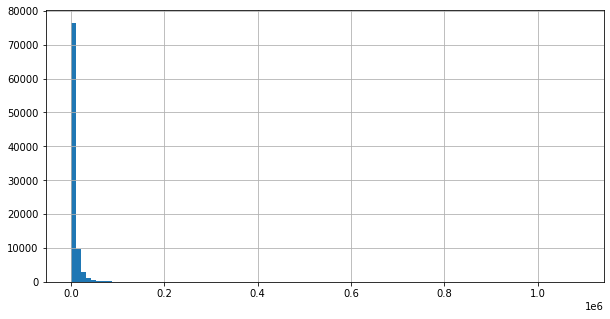

In [ ]:
merge_df['자산_금융자산_저축_적립예치식저축금액'].hist(bins=100, figsize=(10,5))

In [ ]:
merge_df['자산_금융자산_저축_적립예치식저축금액']

0        65406
1         4648
2            5
3        11516
4          216
         ...  
91789      130
91790    37172
91791     4918
91792     7260
91793     7740
Name: 자산_금융자산_저축_적립예치식저축금액, Length: 91794, dtype: int64

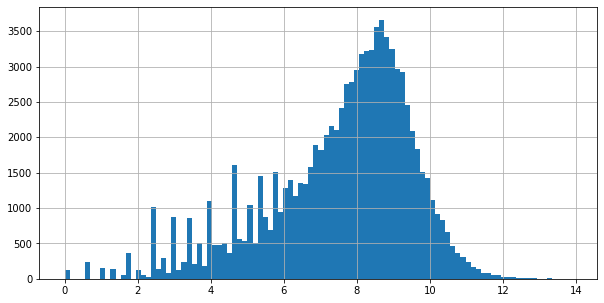

In [ ]:
np.log1p(merge_df['자산_금융자산_저축_적립예치식저축금액']).hist(bins=100, figsize=(10,5))

이제 lev4_merge_0420.csv 파일만 불러오고
새로운 노트북 생성해서 시각화랑 로그스케일링만 하는 ipynb 파일을 새로 만들자 !

아래 링크 꼭 참고하기

http://www.aitimes.com/news/articleView.html?idxno=134913
